In [58]:
import numpy as np

In [59]:
# Sigmoid Activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of Sigmoid Activation function(Backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

In [60]:
# Training Data (X = inputs,Y = labels)

X = np.array([[0,0],[0,1],[1,0],[1,1]]) # XOR Inputs

Y = np.array([[0],[1],[1],[0]]) # XOR Outputs


In [61]:
# Initialize the Weights summary
np.random.seed(1)
weights = np.random.uniform(-1,1,(2,1))


In [62]:
# Learning Rate
alpha = 0.1

In [63]:
# Training Loop (Gradient Descent)
for epoch in range(10000):
    # Forward Propagation
    Z = np.dot(X,weights)
    Y_pred = sigmoid(Z)

    # Compute Loss
    error = Y - Y_pred

    # Backpropagation : Compute Gradient
    adjustments = error * sigmoid_derivative(Y_pred)

    # Update Weights 
    weights += np.dot(X.T,adjustments) * alpha

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.abs(error))
        print(f"Epoch {epoch} , Loss: {loss}") 


Epoch 0 , Loss: 0.5003062601510642
Epoch 1000 , Loss: 0.4999999999999985
Epoch 2000 , Loss: 0.5
Epoch 3000 , Loss: 0.5
Epoch 4000 , Loss: 0.5
Epoch 5000 , Loss: 0.5
Epoch 6000 , Loss: 0.5
Epoch 7000 , Loss: 0.5
Epoch 8000 , Loss: 0.5
Epoch 9000 , Loss: 0.5


In [64]:
# Final Weights
print("\n Final Weights:", weights)


 Final Weights: [[-3.32759729e-16]
 [ 1.64218793e-16]]


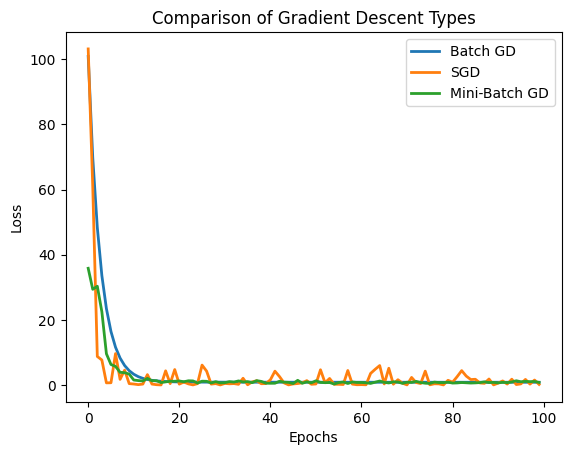

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dummy data
np.random.seed(42)
X = np.linspace(-5, 5, 100)
Y = 2 * X + np.random.randn(100)  # Linear relationship with noise

# Gradient Descent Function
def gradient_descent(X, Y, learning_rate=0.01, epochs=100, batch_size=None):
    W = np.random.randn()  # Random weight initialization
    b = np.random.randn()
    n = len(X)
    loss_history = []

    for epoch in range(epochs):
        if batch_size is None:  # Batch GD
            batch_X, batch_Y = X, Y
        else:  # Mini-Batch or SGD
            indices = np.random.choice(n, batch_size, replace=False)
            batch_X, batch_Y = X[indices], Y[indices]

        # Compute gradients
        Y_pred = W * batch_X + b
        grad_W = -2 * np.mean(batch_X * (batch_Y - Y_pred))
        grad_b = -2 * np.mean(batch_Y - Y_pred)

        # Update weights
        W -= learning_rate * grad_W
        b -= learning_rate * grad_b

        loss = np.mean((batch_Y - Y_pred) ** 2)
        loss_history.append(loss)

    return W, b, loss_history

# Run each type
W_batch, b_batch, loss_batch = gradient_descent(X, Y, batch_size=None)  # Batch GD
W_sgd, b_sgd, loss_sgd = gradient_descent(X, Y, batch_size=1)  # SGD
W_mini, b_mini, loss_mini = gradient_descent(X, Y, batch_size=20)  # Mini-Batch GD

# Plot loss history
plt.plot(loss_batch, label="Batch GD", linewidth=2)
plt.plot(loss_sgd, label="SGD", linewidth=2)
plt.plot(loss_mini, label="Mini-Batch GD", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Comparison of Gradient Descent Types")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Generate some dummy data
X_train = np.random.rand(1000, 10)
Y_train = np.random.randint(0, 2, (1000, 1))

# Build a simple model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Try different optimizers
optimizers = {
    "SGD": keras.optimizers.SGD(learning_rate=0.01),
    "Momentum": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "RMSprop": keras.optimizers.RMSprop(learning_rate=0.01),
    "Adam": keras.optimizers.Adam(learning_rate=0.01)
}

for name, optimizer in optimizers.items():
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    print(f"\nTraining with {name} optimizer:")
    model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=1)


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD optimizer:
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5040 - loss: 0.7103 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4784 - loss: 0.6999
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5138 - loss: 0.6943
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5109 - loss: 0.6926
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5121 - loss: 0.6948

Training with Momentum optimizer:
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5015 - loss: 0.6972 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4946 - loss: 0.6957
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5246 - loss: 0.6940
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5445 - loss: 0.6918 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5481 - loss: 0.6926

Training with RMSprop optimizer:
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4748 